# *Hirsh Scholars*: The Capital Asset Pricing Model (CAPM)

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import warnings
from PIL import Image
import urllib.request as url
import io

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime as dt  
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import warnings
warnings.simplefilter('ignore')
import fix_yahoo_finance as yf
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


## The Capital Asset Pricing Model (CAPM)

CAPM remains one of the workhorse statistical models in finance.  It is so common that sites like Yahoo!Finance report the measures we will estimate statistically.  

**I use CAPM for a reason: absent experimental data, it is the only application of the bivariate linear model that I believe has validity in the real world.**

The upshot of the CAPM says that we can directly interpret the intercept and slope coefficients as real-world measures relating the excess (or risk-adjusted) returns of a particular stock to those of a basket of stocks, such as a specific market.

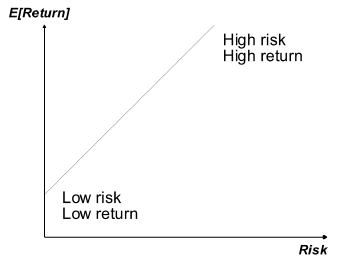

In [2]:
fd = url.urlopen("https://www.researchgate.net/profile/Fabio_Gonzalez4/publication/265239544/figure/fig3/AS:295901470969866@1447559816719/Risk-Return-tradeoff.png")
image_file = io.BytesIO(fd.read())
Image.open(image_file)

### CAPM: Regression and Hypothesis Testing

It lies at the heart of portfolio optimization that won Harry Markowitz a Nobel Prize in Economics in 1990. The idea is simple: we seek to measure historic correlation patterns between potential investment opportunities.

It was developed to examine equities, but its application have expanded far beyond this asset class.  As part of the broader undertaking of portfolio optimization, it is used to explain most core concepts.

Asset Classes:
* Cash
* Bonds
* Equities
* Real Estate

Until recently, it was difficult for non-instititutional investors to have exposure to real estate, other than owning a house.  Investors can now expose themselves to real estate as an asset class.

To be more mathematically precise, let $X$ and $Y$ be random variables with finite variances, $\sigma^2_x$ and $\sigma^2_y$.  Consider some convex combination of $X$ and $Y$, $\alpha X + (1-\alpha) Y$.  This combination is called a portfolio.  The variance of this portfolio, which is a measure of risk, is:

$Var(\alpha X + (1-\alpha) Y) = \alpha^2 \sigma^2_x + (1-\alpha^2) \sigma^2_y + 2\alpha (1 -\alpha) Cov(X, Y)$

This variance is driven essentially by $\alpha$ and $Cov(X, Y)$. 

* Risk can be eliminated only when $Cov(X, Y) = -1$ or $1$.  This is accomplished through shorting.
* With imperfect correlation, the focus becomes $\alpha$.
* Hence, we have Markowitz's Mean / Variance model.
* Let $X_i$ denote asset $i$.
* Let $w_i$ be an asset allocation weight.
* Let the portfolio be denoted as $P$, $P = \sum_i{w_i X_i}$
* Let the portfolio returns be denoted as $r_P$.

There is considerable theory around minimizing the risk of P for a given return based on the above.  From this theory is straightforward to derive the CAPM (but such derivation is beyond the scope of this class).

### A Motivation

* Suppose $w_i = 1/n$ or equal weights to all $n$ assets in the portfolio.
* Certainty: Variance does not matter.
* Uncertainty: Variance does matter.
* Uncertainty with a portfolio, $P$: Only covariance matters.  Therefore, diversification is a covariance game.
* $\displaystyle{\sigma^2_p = \sum_{i, j} w_i w_j c_{i, j} = \sum_i w^2_i \sigma^2_i + \sum_{i \ne j} \le n^{-2} T + n^{-2} \sum_{i \ne j}c_{i,j} = n^{-2} T + (1-n^{-1}) c}$ if we assume $c_{i,j} = c$
* $\displaystyle{\lim_{n \rightarrow \inf} n^{-2} T + (1-n^{-1}) c = c}$
* Diversification is a covariance game, $c$.

### A Return to the Mathematics

Let $r_i$ denote the rate of return to asset $i$, $r_f$ denote the known rate of return on a risk-free asset (for example, short-term US government debt), and $r_m$ denote the rate of return to a portfolio (or a market) that includes $i$.  

The following equation can be derived:

$E(r_i)-r_f = \alpha + \beta \cdot (E(r_{Mi})-r_f)$

Here, $E(\cdot)$ denotes an expected value (because this is a forward-looking prediction).  In CAPM, $\beta$ captures the sensitivity of an asset’s returns to the returns to a portfolio or to the market on which an asset trades.  In other words, it non-diversifiable risk.  In addition, $\alpha$ measures an asset $i$’s excess (or abnormal) returns.

Phrases you may have heard: 

1. The stock's beta is high
2. The hedge fund is chasing alpha

### Let's Look at the Obvious: Teaching in a Sea of These

#### Notes
* This used to be easy until the death of the Yahoo!Finance API.
* pip install fix_yahoo_finance

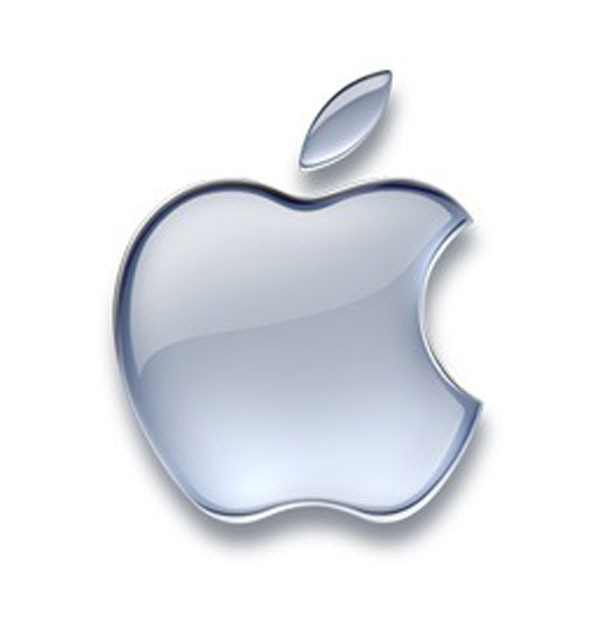

In [3]:
fd = url.urlopen("http://buzzmybiz.co/wp-content/uploads/2012/06/apple-logo.jpg")
image_file = io.BytesIO(fd.read())
Image.open(image_file)

In [4]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime as dt  
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import warnings
warnings.simplefilter('ignore')
import fix_yahoo_finance as yf

Populating the interactive namespace from numpy and matplotlib


In [5]:
# Grab Apple and NASDAQ data.  

start, end = "2006-01-01", "2016-12-31"

aapl_all = yf.download('AAPL', start=start, end=end)
nasdaq_all = yf.download('^IXIC', start=start, end=end)
aapl = aapl_all['Adj Close']
nasdaq = nasdaq_all['Adj Close']

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


Text(0.5, 1.0, 'AAPL ($/Share)')

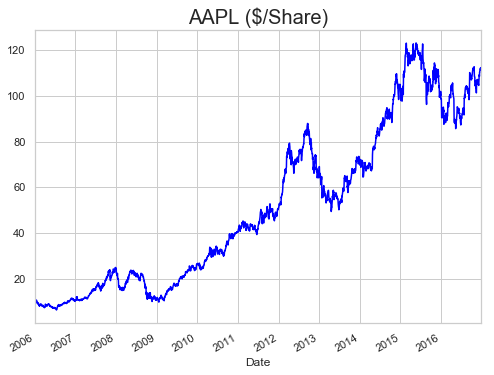

In [6]:
plt.figure(figsize=(8, 6))
aapl.plot(color='blue')
plt.title('AAPL ($/Share)', fontsize=20)

Text(0.5, 1.0, 'NASDAQ')

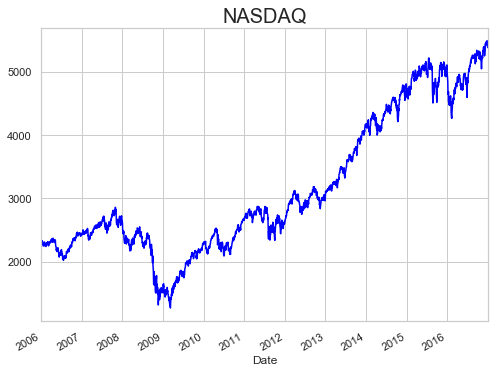

In [7]:
plt.figure(figsize = (8, 6))
nasdaq.plot(color='blue')
plt.title('NASDAQ', fontsize=20)

In [8]:
# Calculate log returns, which is the standard finance measure for daily returns in finance.

aapl_returns = (np.log(aapl / aapl.shift(1))).dropna()
nasdaq_returns = (np.log(nasdaq / nasdaq.shift(1))).dropna()

In [9]:
print("Average daily AAPL returns and 'risk' are %f and %f" % (aapl_returns.mean(), aapl_returns.std()))

Average daily AAPL returns and 'risk' are 0.000895 and 0.021083


(0, 60)

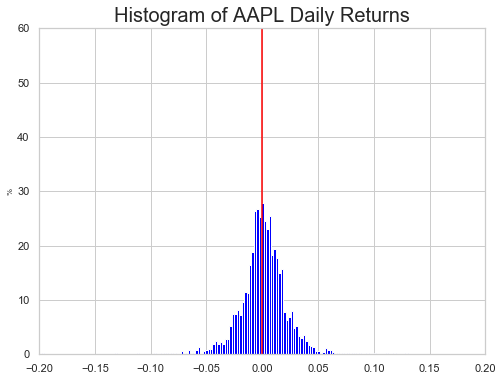

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(aapl_returns, bins=150, density=True, color='blue')
plt.title('Histogram of AAPL Daily Returns', fontsize=20)
plt.ylabel('%', fontsize=8)
plt.axvline(0, color='red')
plt.xlim(-0.2, 0.2)
plt.ylim(0, 60)

In [11]:
print("Average daily market returns and 'risk' are %f and %f" % (nasdaq_returns.mean(), nasdaq_returns.std()))

Average daily market returns and 'risk' are 0.000316 and 0.013625


(0, 60)

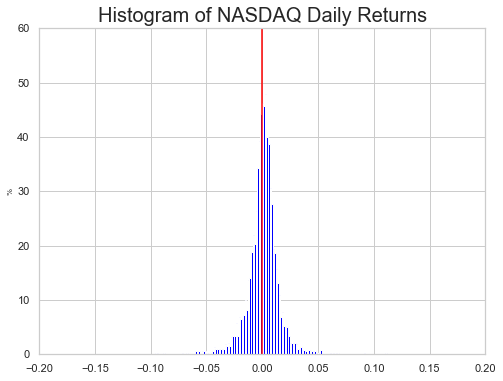

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(nasdaq_returns, bins=150, density=True, color='blue')
plt.title('Histogram of NASDAQ Daily Returns', fontsize=20)
plt.ylabel('%', fontsize=8)
plt.axvline(0, color='red')
plt.xlim(-0.2, 0.2)
plt.ylim(0, 60)

In [13]:
aapl_returns = pd.DataFrame(aapl_returns)
nasdaq_returns = pd.DataFrame(nasdaq_returns)

(-0.1, 0.1)

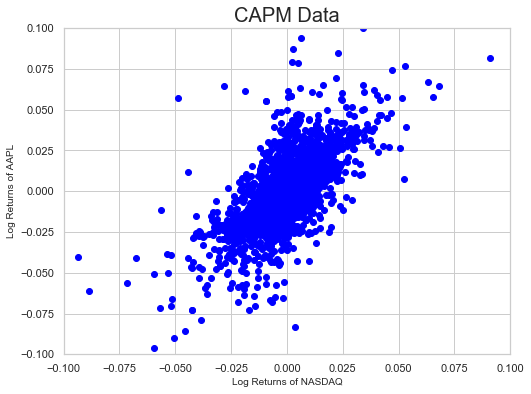

In [14]:
plt.figure(figsize = (8, 6))
plt.scatter(y=aapl_returns, x=nasdaq_returns, c='blue')
plt.title('CAPM Data', fontsize = 20)
plt.xlabel('Log Returns of NASDAQ', fontsize = 10)
plt.ylabel('Log Returns of AAPL', fontsize = 10)
plt.xlim([-0.1, 0.1])
plt.ylim([-0.1, 0.1])

#### Notes
* Merge and rename.
* We create two dataframes using Pandas.
* We then merge the two dataframes using the indexes associated with each frame.  
* You will be able to use this code repeatedly.

In [15]:
aapl_r = pd.DataFrame(aapl_returns)
nasdaq_r = pd.DataFrame(nasdaq_returns)
data = pd.merge(nasdaq_r, aapl_r, left_index=True, right_index=True)
data.rename(columns={'Adj Close_x':'nasdaq', 'Adj Close_y':'aapl'}, inplace=True)
mod = smf.ols(formula='aapl ~ nasdaq', data = data).fit()
print(mod.summary())
print(data.describe())

                            OLS Regression Results                            
Dep. Variable:                   aapl   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     2112.
Date:                Sat, 10 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:30:24   Log-Likelihood:                 7540.5
No. Observations:                2768   AIC:                        -1.508e+04
Df Residuals:                    2766   BIC:                        -1.507e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.000      1.898      0.0

(-0.1, 0.1)

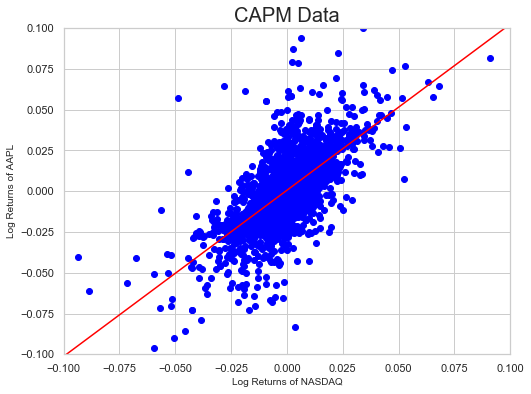

In [16]:
figure, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y=aapl_returns, x=nasdaq_returns, c='blue')
mod = smf.ols(formula='aapl ~ nasdaq', data = data).fit()
abline_plot(model_results=mod, ax=ax, color='red')

ax.set_title('CAPM Data', fontsize = 20)
ax.set_ylabel('Log Returns of AAPL', fontsize = 10)
ax.set_xlabel('Log Returns of NASDAQ', fontsize = 10)
ax.set_xlim([-0.1, 0.1])
ax.set_ylim([-0.1, 0.1])

### CAPM Exercise 2

In [17]:
start, end = "2008-08-31", "2018-08-31"

goog_all = yf.download('GOOG', start=start, end=end)
nasdaq_all = yf.download('^IXIC', start=start, end=end)
goog = goog_all['Adj Close']
nasdaq = nasdaq_all['Adj Close']

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


Text(0.5, 1.0, 'GOOG ($/Share)')

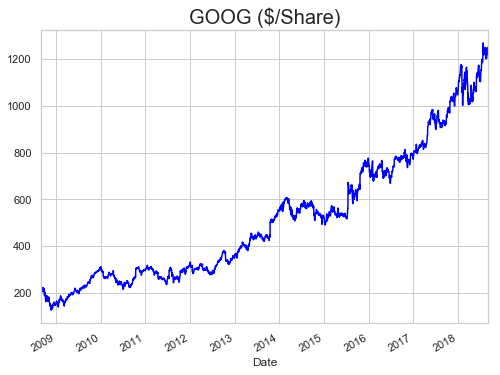

In [18]:
plt.figure(figsize=(8, 6))
goog.plot(color='blue')
plt.title('GOOG ($/Share)', fontsize=20)

Text(0.5, 1.0, 'NASDAQ')

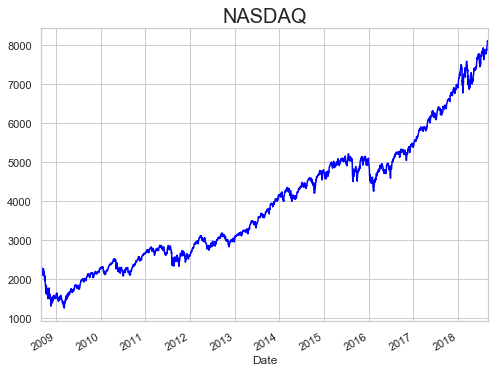

In [19]:
plt.figure(figsize = (8, 6))
nasdaq.plot(color='blue')
plt.title('NASDAQ', fontsize=20)

In [20]:
goog_returns = (np.log(goog / goog.shift(1))).dropna()
nasdaq_returns = (np.log(nasdaq / nasdaq.shift(1))).dropna()

(0, 60)

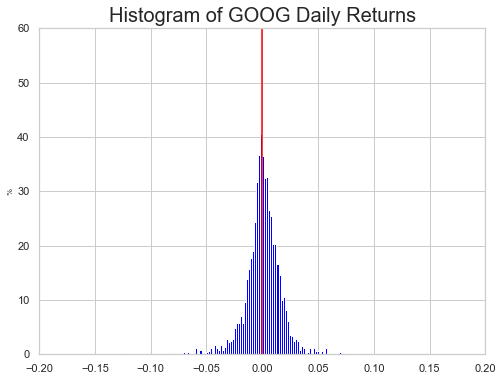

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(goog_returns, bins=150, density=True, color='blue')
plt.title('Histogram of GOOG Daily Returns', fontsize=20)
plt.ylabel('%', fontsize=8)
plt.axvline(0, color='red')
plt.xlim(-0.2, 0.2)
plt.ylim(0, 60)

(0, 60)

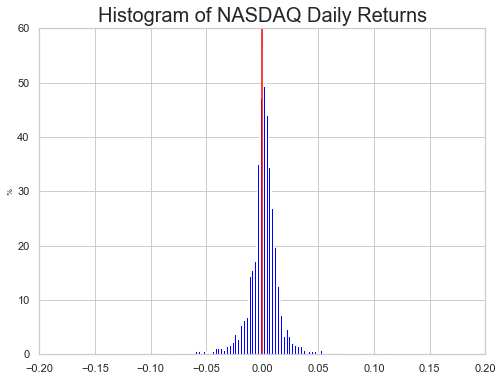

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(nasdaq_returns, bins=150, density=True, color='blue')
plt.title('Histogram of NASDAQ Daily Returns', fontsize=20)
plt.ylabel('%', fontsize=8)
plt.axvline(0, color='red')
plt.xlim(-0.2, 0.2)
plt.ylim(0, 60)

(-0.1, 0.1)

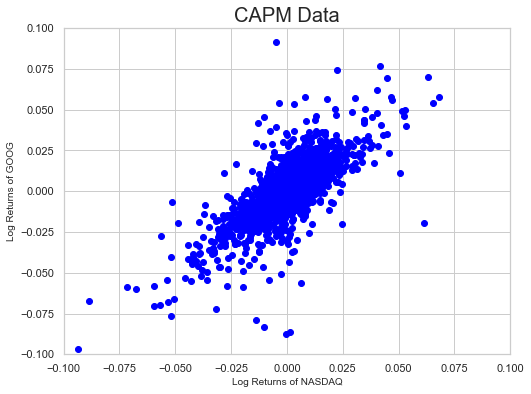

In [23]:
goog_returns = pd.DataFrame(goog_returns)
nasdaq_returns = pd.DataFrame(nasdaq_returns)

plt.figure(figsize = (8, 6))
plt.scatter(y=goog_returns, x=nasdaq_returns, c='blue')
plt.title('CAPM Data', fontsize = 20)
plt.xlabel('Log Returns of NASDAQ', fontsize = 10)
plt.ylabel('Log Returns of GOOG', fontsize = 10)
plt.xlim([-0.1, 0.1])
plt.ylim([-0.1, 0.1])

In [24]:
data = pd.merge(nasdaq_returns, goog_returns, left_index=True, right_index=True)
data.rename(columns={'Adj Close_x':'nasdaq', 'Adj Close_y':'goog'}, inplace=True)
mod = smf.ols(formula='goog ~ nasdaq', data = data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   goog   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     2985.
Date:                Sat, 10 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:30:26   Log-Likelihood:                 7627.1
No. Observations:                2518   AIC:                        -1.525e+04
Df Residuals:                    2516   BIC:                        -1.524e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002      0.000      0.823      0.4

(-0.1, 0.1)

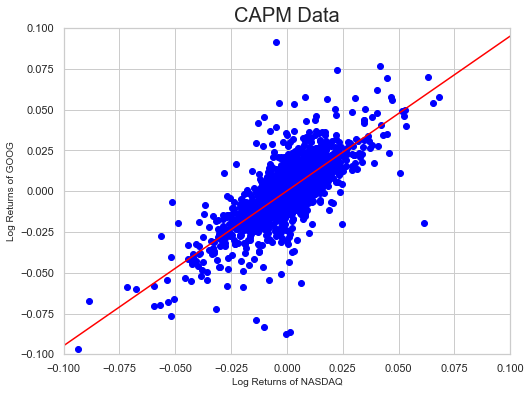

In [25]:
figure, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y=goog_returns, x=nasdaq_returns, c="blue")
mod = smf.ols(formula='goog ~ nasdaq', data = data).fit()
abline_plot(model_results=mod, ax=ax, color='red')

ax.set_title('CAPM Data', fontsize = 20)
ax.set_ylabel('Log Returns of GOOG', fontsize = 10)
ax.set_xlabel('Log Returns of NASDAQ', fontsize = 10)
ax.set_xlim([-0.1, 0.1])
ax.set_ylim([-0.1, 0.1])

### CAPM Exercise 3

In [26]:
start, end = "2006-01-01", "2016-12-31"

amzn_all = yf.download('AMZN', start=start, end=end)
nasdaq_all = yf.download('^IXIC', start=start, end=end)
amzn = amzn_all['Adj Close']
nasdaq = nasdaq_all['Adj Close']

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [27]:
amzn_returns = (np.log(amzn / amzn.shift(1))).dropna()
nasdaq_returns = (np.log(nasdaq / nasdaq.shift(1))).dropna()

(-0.1, 0.1)

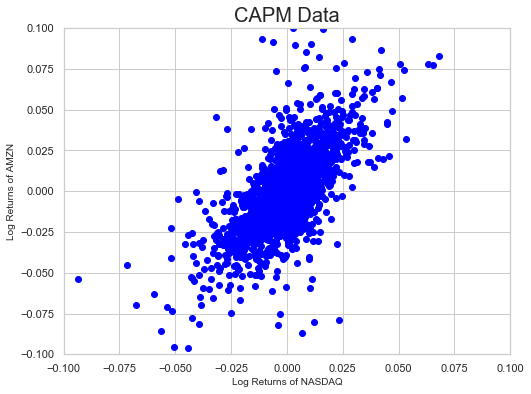

In [28]:
amzn_returns = pd.DataFrame(amzn_returns)
nasdaq_returns = pd.DataFrame(nasdaq_returns)

plt.figure(figsize = (8, 6))
plt.scatter(y=amzn_returns, x=nasdaq_returns, c='blue')
plt.title('CAPM Data', fontsize = 20)
plt.xlabel('Log Returns of NASDAQ', fontsize = 10)
plt.ylabel('Log Returns of AMZN', fontsize = 10)
plt.xlim([-0.1, 0.1])
plt.ylim([-0.1, 0.1])

In [29]:
data = pd.merge(nasdaq_returns, amzn_returns, left_index=True, right_index=True)
data.rename(columns={'Adj Close_x':'nasdaq', 'Adj Close_y':'amzn'}, inplace=True)
mod = smf.ols(formula='amzn ~ nasdaq', data = data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   amzn   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     1707.
Date:                Sat, 10 Aug 2019   Prob (F-statistic):          4.38e-291
Time:                        15:30:27   Log-Likelihood:                 6871.6
No. Observations:                2768   AIC:                        -1.374e+04
Df Residuals:                    2766   BIC:                        -1.373e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.000      1.633      0.1

(-0.1, 0.1)

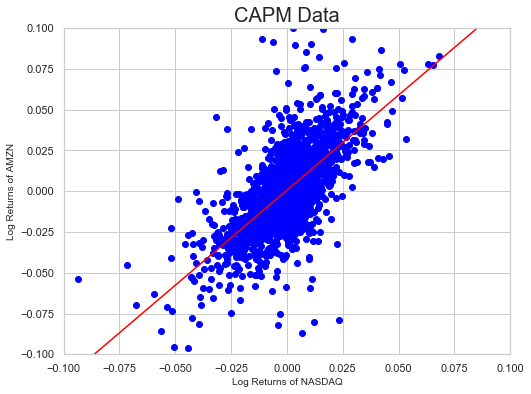

In [30]:
figure, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y=amzn_returns, x=nasdaq_returns, c="blue")
mod = smf.ols(formula='amzn ~ nasdaq', data = data).fit()
abline_plot(model_results=mod, ax=ax, color='red')

ax.set_title('CAPM Data', fontsize = 20)
ax.set_ylabel('Log Returns of AMZN', fontsize = 10)
ax.set_xlabel('Log Returns of NASDAQ', fontsize = 10)
ax.set_xlim([-0.1, 0.1])
ax.set_ylim([-0.1, 0.1])